In [ ]:
from cProfile import label
import warnings
warnings.filterwarnings('ignore')
# Import libraries
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import missingno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
name = pd.read_excel("short_data.xlsx", sheet_name="Name", index_col=0)     # 8208 cells
public_date = pd.read_excel("short_data.xlsx", sheet_name="Public Date", index_col=0, parse_dates=True)
ocf = pd.read_excel("short_data.xlsx", sheet_name="OCF", index_col=0)   # 1113 missing values   86%
roa = pd.read_excel("short_data.xlsx", sheet_name="ROA", index_col=0)   # 1424    83%
ta = pd.read_excel("short_data.xlsx", sheet_name="TA", index_col=0)   # 1115   86%
mv = pd.read_excel("short_data.xlsx", sheet_name="MV", index_col=0)   # 1795    78%
total_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Lia", index_col=0)    # 1114    86%
sales = pd.read_excel("short_data.xlsx", sheet_name="Sales", index_col=0)   # 1104    87%
tangible_FA = pd.read_excel("short_data.xlsx", sheet_name="Tangible FA", index_col=0)   # 1124    86%
total_ca = pd.read_excel("short_data.xlsx", sheet_name="Total CA", index_col=0)   # 1114    86%
current_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Current Lia", index_col=0)   # 1114    86%
fixed_assets = pd.read_excel("short_data.xlsx", sheet_name="Fixed assets", index_col=0)
accounts_receivable = pd.read_excel("short_data.xlsx", sheet_name="Accounts Receivable", index_col=0)
costs_of_revenue = pd.read_excel("short_data.xlsx", sheet_name="Costs of revenue", index_col=0)
ebit = pd.read_excel("short_data.xlsx", sheet_name="EBIT", index_col=0)
eps = pd.read_excel("short_data.xlsx", sheet_name="EPS", index_col=0)
equity = pd.read_excel("short_data.xlsx", sheet_name="Equity", index_col=0)
avg_receivable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Receivable days", index_col=0)
avg_payable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Payable days", index_col=0)
avg_inventory_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Inventory days", index_col=0)
# Biến vĩ mô
gdp = pd.read_excel("short_data.xlsx", sheet_name="GDP", index_col=0)
cpi = pd.read_excel("short_data.xlsx", sheet_name="CPI", index_col=0)
interest_rates = pd.read_excel("short_data.xlsx", sheet_name="Interest rates", index_col=0)

In [ ]:
# Drop companies are established under 5 years
com_under5years = []
for i in name.index:
  if int(public_date.loc[i,'Date Became Public'].strftime('%Y')) > 2015:
    com_under5years.append(i)
print(len(com_under5years))  # 168 companies are established under 5 years.

name.drop(com_under5years,axis='index', inplace=True)   # 516 remained companies
ocf.drop(com_under5years,axis='columns', inplace=True)
roa.drop(com_under5years,axis='columns', inplace=True)
ta.drop(com_under5years,axis='columns', inplace=True)
mv.drop(com_under5years,axis='columns', inplace=True)
total_lia.drop(com_under5years,axis='columns', inplace=True)
sales.drop(com_under5years,axis='columns', inplace=True)
tangible_FA.drop(com_under5years,axis='columns', inplace=True)
total_ca.drop(com_under5years,axis='columns', inplace=True)
current_lia.drop(com_under5years,axis='columns', inplace=True)
fixed_assets.drop(com_under5years,axis='columns', inplace=True)
accounts_receivable.drop(com_under5years,axis='columns', inplace=True)
costs_of_revenue.drop(com_under5years,axis='columns', inplace=True)
ebit.drop(com_under5years,axis='columns', inplace=True)
eps.drop(com_under5years,axis='columns', inplace=True)
equity.drop(com_under5years,axis='columns', inplace=True)
avg_receivable_days.drop(com_under5years,axis='columns', inplace=True)
avg_payable_days.drop(com_under5years,axis='columns', inplace=True)
avg_inventory_days.drop(com_under5years,axis='columns', inplace=True)
gdp.drop(com_under5years,axis='columns', inplace=True)
cpi.drop(com_under5years,axis='columns', inplace=True)
interest_rates.drop(com_under5years,axis='columns', inplace=True)
public_date = public_date.loc[name.index, :]

public_date.shape

industry = name['TRBC Economic Sector Name'].value_counts().index.tolist()

168


Energy

In [ ]:
# Energy
for i in name.index:
  if "Energy" not in name["TRBC Economic Sector Name"][i]:
    name = name.drop(labels=i, axis=0)
    public_date = public_date.drop(labels=i, axis=0)

In [ ]:
def drop_company(data, name):
  for i in data.columns:
    if i not in name.index:
      del data[i]
  return data

ocf = drop_company(ocf, name)
roa = drop_company(roa, name)
ta = drop_company(ta, name)
mv = drop_company(mv, name)
total_lia = drop_company(total_lia, name)
sales = drop_company(sales, name)
tangible_FA = drop_company(tangible_FA, name)
total_ca = drop_company(total_ca, name)
current_lia = drop_company(current_lia, name)
fixed_assets = drop_company(fixed_assets, name)
accounts_receivable = drop_company(accounts_receivable, name)
costs_of_revenue = drop_company(costs_of_revenue, name)
ebit = drop_company(ebit, name)
eps = drop_company(eps, name)
equity = drop_company(equity, name)
avg_receivable_days = drop_company(avg_receivable_days, name)
avg_payable_days = drop_company(avg_payable_days, name)
avg_inventory_days = drop_company(avg_inventory_days, name)
gdp = drop_company(gdp, name)
cpi = drop_company(cpi, name)
interest_rates = drop_company(interest_rates, name)


In [ ]:
# Fill Avg. Inventory days

# Cách 1: For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

avg_inventory_days = avg_inventory_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_inventory_days.isnull().sum().sum())   # 48 (VNF.HN, VNT.HN, VNL.HM, TVC.HN bị NaN nguyên cột)

# Fill Avg. Payable days

avg_payable_days = avg_payable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_payable_days.isnull().sum().sum())   # 0

# Fill Avg. Receivable days

avg_receivable_days = avg_receivable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_receivable_days.isnull().sum().sum())  # 0

# Fill Equity

equity = equity.interpolate(method='linear', limit_direction='both', axis=0)
print(equity.isnull().sum().sum())

# Fill Fixed Assets

fixed_assets = fixed_assets.interpolate(method='linear', limit_direction='both', axis=0)
print(fixed_assets.isnull().sum().sum())

# Fill EBIT

ebit = ebit.interpolate(method='linear', limit_direction='both', axis=0)
print(ebit.isnull().sum().sum())

# Fill cost of revenue

costs_of_revenue = costs_of_revenue.interpolate(method='linear', limit_direction='both', axis=0)
print(costs_of_revenue.isnull().sum().sum())

# Fill A.R

accounts_receivable = accounts_receivable.interpolate(method='linear', limit_direction='both', axis=0)
print(accounts_receivable.isnull().sum().sum())

0
0
0
0
0
0
0
0


In [ ]:
def detect_nan(data):
  nan_values = data.isna()
  nan_columns = nan_values.any()
  columns_with_nan = data.columns[nan_columns].tolist()
  return (columns_with_nan)

detect_nan(avg_inventory_days)


def fix_negative(data):
  for j in range(data.shape[1]):
    for i in range(data.shape[0]):
      if data.iloc[i,j] < 0:
        data.iloc[i,j] = 0-data.iloc[i,j]

fix_negative(costs_of_revenue)
fix_negative(accounts_receivable)
fix_negative(avg_inventory_days)
fix_negative(avg_receivable_days)
fix_negative(avg_payable_days)

In [ ]:
# # Calculate NI
# ni = roa * ta

# Calculate Size
size = np.log(mv)

# # Calculate Leverage
# lev = total_lia / ta

# Calculate PPE
ppe = tangible_FA / sales

# Calculate Liquidity
liq = total_ca / current_lia

# Calculate Growth                                            (based on 2010-2020)
growth = sales.pct_change(periods=1)
growth.drop(growth.index[0], axis='index', inplace=True)

# Calculate Inv turnover ratio
inv_turnover = 365 / avg_inventory_days

# Calculate Inv
inv = sales/inv_turnover

# Calculate Quick ratio
quick = (total_ca - inv) / current_lia

# Calculate FA turnover ratio
fa_turnover = sales / fixed_assets

# Calculate TA turnover ratio
ta_turnover = sales / ta

# Calculate DSO
dso = accounts_receivable / (sales / 365)

# Calculate Capital intensity
capital_intensity = ta / sales

# Calculate Expense revenue ratio
expense_revenue = costs_of_revenue / sales

# Calculate Operating margin
operating_margin = ebit / sales

# # Calculate Net profit margin
# net_profit_margin = ni / sales

# Calculate BEP
bep = ebit / ta

# # Calculate ROE
# roe = ni / equity

# Calculate growth of CCC
ccc = avg_inventory_days + avg_receivable_days - avg_payable_days

# Drop year 2009
# ni.drop(ni.index[0], axis='index', inplace=True)
ocf.drop(ocf.index[0], axis='index', inplace=True)
size.drop(size.index[0], axis='index', inplace=True)
# lev.drop(lev.index[0], axis='index', inplace=True)
ppe.drop(ppe.index[0], axis='index', inplace=True)
liq.drop(liq.index[0], axis='index', inplace=True)
inv_turnover.drop(inv_turnover.index[0], axis='index', inplace=True)
quick.drop(quick.index[0], axis='index', inplace=True)
fa_turnover.drop(fa_turnover.index[0], axis='index', inplace=True)
ta_turnover.drop(ta_turnover.index[0], axis='index', inplace=True)
dso.drop(dso.index[0], axis='index', inplace=True)
capital_intensity.drop(capital_intensity.index[0], axis='index', inplace=True)
expense_revenue.drop(expense_revenue.index[0], axis='index', inplace=True)
operating_margin.drop(operating_margin.index[0], axis='index', inplace=True)
# net_profit_margin.drop(net_profit_margin.index[0], axis='index', inplace=True)
bep.drop(bep.index[0], axis='index', inplace=True)
# roe.drop(roe.index[0], axis='index', inplace=True)
roa.drop(roa.index[0], axis='index', inplace=True)
eps.drop(eps.index[0], axis='index', inplace=True)
ccc.drop(ccc.index[0], axis='index', inplace=True)
gdp.drop(gdp.index[0], axis='index', inplace=True)
cpi.drop(cpi.index[0], axis='index', inplace=True)
interest_rates.drop(interest_rates.index[0], axis='index', inplace=True)

# Calculate Age of companies
ind = list(range(2010, 2021))
col = size.columns
age = pd.DataFrame(columns=size.columns)

for i in ind:
  list_year = []
  for j in size.columns:
    num = i - public_date.loc[j,'Organization Founded Year']
    list_year.append(num)
  age_length = len(age)
  age.loc[age_length] = list_year
age.index = size.index

age = age.replace(list(range(-5,0)), np.NaN)

In [ ]:
cols=[]
for j in range(len(total_ca.columns)):
  for i in range(len(total_ca.index)):
    if total_ca.iloc[i,j] < inv.iloc[i,j]:
      cols.append(total_ca.columns[j])
      break
print(len(cols))

cols=[]
for j in range(len(ebit.columns)):
  for i in range(len(ebit.index)):
    if sales.iloc[i,j] < ebit.iloc[i,j]:
      cols.append(ebit.columns[j])
      break
print(len(cols))

# cols=[]
# for j in range(len(ni.columns)):
#   for i in range(len(ni.index)):
#     if sales.iloc[i,j] < ni.iloc[i,j]:
#       cols.append(ni.columns[j])
#       break
# print(len(cols))


10
0


In [ ]:
# # NI > 0 & OCF > 0 --> Nhóm profit (có lợi nhuận ròng và lợi nhuận từ hoạt động kd)
# # NI<= 0 & OCF <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

# target = pd.DataFrame(np.random.randn(11, 35), columns=size.columns, index = size.index)
# for i in range(len(size.index)):
#   for j in range(len(size.columns)):
#     if ni.iloc[i,j] > 0 and ocf.iloc[i,j] > 0:
#       target.iloc[i,j] = 1
#     else:
#       target.iloc[i,j] = 0
# print(target.to_string())

In [ ]:
roatb = roa.mean()
roatb = roatb.values
roatb = np.mean(roatb)
print(roatb)

0.05663354375278313


In [ ]:
# ROA > ROA TB --> Nhóm profit (có lợi nhuận ròng và dòng tiền dương từ hoạt động kd)
# ROA < ROA TB <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

target = pd.DataFrame(np.random.randn(11, 35), columns=size.columns, index = size.index)
for i in range(len(size.index)):
  for j in range(len(size.columns)):
    if roa.iloc[i,j] > roatb:
      target.iloc[i,j] = 1
    else:
      target.iloc[i,j] = 0
print(target.to_string())

      HTC.HN  PXS.HM  CMV.HM  APP.HN  PCG.HN  PPS.HN  TVD.HN  GSP.HM  GAS.HM  PVT.HM  COM.HM  SFC.HM  TMC.HN  PJT.HM  PVD.HM  VIP.HM  PGC.HM  PGS.HN  PVC.HN  VTO.HM  ASP.HM  PVS.HN  NBC.HN  PLC.HN  PSC.HN  PTS.HN  TC6.HN  THT.HN  TDN.HN  PJC.HN  PVG.HN  HLC.HN  MDC.HN  PGD.HM  CCI.HM
Year                                                                                                                                                                                                                                                                                        
2010     1.0     1.0     1.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0     1.0     1.0     1.0     1.0     1.0     0.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0     1.0     0.0     1.0     1.0     1.0     1.0     1.0     0.0     0.0     1.0     1.0     0.0
2011     1.0     1.0     1.0     1.0     0.0     0.0     1.0     1.0     1.0     0.0     1.0     1.0     1.0     1.0     1.0     0.0     0.0     

In [ ]:
data = pd.DataFrame()
data['Size'] = size.values.flatten()
# data['Leverage'] = lev.values.flatten()
data['Growth'] = growth.values.flatten()
data['PPE'] = ppe.values.flatten()
data['Liquidity'] = liq.values.flatten()
data['Age'] = age.values.flatten()
data['Quick ratio'] = quick.values.flatten()
data['Inventory turnover ratio'] = inv_turnover.values.flatten()
data['FA turnover ratio'] = fa_turnover.values.flatten()
data['TA turnover ratio'] = ta_turnover.values.flatten()
data['DSO'] = dso.values.flatten()
data['Capital intensity'] = capital_intensity.values.flatten()
data['Expense of revenue ratio'] = expense_revenue.values.flatten()
data['Operating margin'] = operating_margin.values.flatten()
# data['Net profit margin'] = net_profit_margin.values.flatten()
# data['ROA'] = roa.values.flatten()
# data['ROE'] = roe.values.flatten()
data['EPS'] = eps.values.flatten()
data['BEP'] = bep.values.flatten()
data['CCC'] = ccc.values.flatten()
data['GDP'] = gdp.values.flatten()
data['CPI'] = cpi.values.flatten()
data['Interest rates'] = interest_rates.values.flatten()
data['Target'] = target.values.flatten()

# Set up multi index
year = np.arange(2010,2021)
com = list(size.columns)

index = pd.MultiIndex.from_product([year, com],
                           names=['Year', 'Company'])
data.index = index
print(data.shape)
data

(385, 20)


Size     Growth       PPE  Liquidity  Age  Quick ratio  \
Year Company                                                                
2010 HTC.HN   25.597700   0.105236  0.080325   2.830776   17     2.795379   
     PXS.HM   26.372240  13.289980  0.305081   0.489422    3    -0.091207   
     CMV.HM   26.271276   0.241248  0.014689   1.140697   18     0.130092   
     APP.HN   24.838332   0.025565  0.085999   2.094066   14     1.547704   
     PCG.HN   26.103186   1.437487  0.009063   2.541481    3     2.361060   
...                 ...        ...       ...        ...  ...          ...   
2020 PVG.HN   26.495330  -0.006463  0.099109   0.974573   13     0.850187   
     HLC.HN   25.960093  -0.137365  0.879666   0.860819   12     0.637411   
     MDC.HN   25.704436   0.196291  0.244096   0.591745   19     0.437099   
     PGD.HM   28.565916  -0.057088  0.059135   1.370590   13     1.345265   
     CCI.HM   26.508283  -0.244980  0.171636  11.352394   28    10.813581   

              Inventory turnover ratio  FA turnover ratio  TA turnover ratio  \
Year Company                                                                   
2010 HTC.HN                 262.057170           2.595134           2.029072   
     PXS.HM                   2.580072           0.883351           0.800316   
     CMV.HM                  12.539513          53.105442           8.590002   
     APP.HN                   6.938579           8.673405           1.489940   
     PCG.HN                  14.710013          15.430857           0.993379   
...                                ...                ...                ...   
2020 PVG.HN                  28.940147          23.917529           2.229842   
     HLC.HN                  11.853094           3.921284           0.769242   
     MDC.HN                  19.160709           7.729607           1.677571   
     PGD.HM                 152.986983         102.528849           2.300826   
     CCI.HM                  20.879260           3.837863           0.419079   

                     DSO  Capital intensity  Expense of revenue ratio  \
Year Company                                                            
2010 HTC.HN     5.474781           0.492836                  3.073478   
     PXS.HM   115.257834           1.249506                  1.100197   
     CMV.HM    14.728126           0.116414                  1.268056   
     APP.HN    96.908461           0.671168                  1.908364   
     PCG.HN    80.695073           1.006665                  0.823548   
...                  ...                ...                       ...   
2020 PVG.HN    33.599273           0.448462                  0.401860   
     HLC.HN     0.737147           1.299980                  0.320746   
     MDC.HN     5.664650           0.596100                  0.361856   
     PGD.HM     8.806528           0.434626                  0.116213   
     CCI.HM    14.687985           2.386182                  0.489455   

              Operating margin         EPS       BEP         CCC       GDP  \
Year Company                                                                 
2010 HTC.HN           0.072740  2814.57086  0.147594    0.792491  6.423238   
     PXS.HM          -0.562870 -4538.43563 -0.450474  195.752909  6.423238   
     CMV.HM           0.003445  1029.05244  0.029588   23.410824  6.423238   
     APP.HN           0.021848  -161.96646  0.032552   80.604485  6.423238   
     PCG.HN          -0.115117 -1496.97261 -0.114355   78.058431  6.423238   
...                        ...         ...       ...         ...       ...   
2020 PVG.HN           0.006930   999.61037  0.015453   -6.285482  2.905836   
     HLC.HN           0.022069  2211.28076  0.016977   15.593263  2.905836   
     MDC.HN           0.015061  1830.09906  0.025266   -9.995736  2.905836   
     PGD.HM           0.031817  2146.33958  0.073206  -19.348476  2.905836   
     CCI.HM           0.034389  3101.00138  0.014412   41.101962  2.905836   

           

In [ ]:
data.dtypes

Size                        float64
Growth                      float64
PPE                         float64
Liquidity                   float64
Age                           int64
Quick ratio                 float64
Inventory turnover ratio    float64
FA turnover ratio           float64
TA turnover ratio           float64
DSO                         float64
Capital intensity           float64
Expense of revenue ratio    float64
Operating margin            float64
EPS                         float64
BEP                         float64
CCC                         float64
GDP                         float64
CPI                         float64
Interest rates              float64
Target                      float64
dtype: object

In [ ]:
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,EPS,BEP,CCC,GDP,CPI,Interest rates,Target
count,379.000000,384.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,382.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,26.634817,0.119298,0.362640,1.688826,13.885714,1.188804,40.196433,15.545615,2.265194,46.372888,0.878211,0.950746,0.058272,1849.070311,0.078919,36.576369,6.001623,5.821202,3.797918,0.423377
std,1.597797,0.738286,0.521414,1.855703,6.965124,1.838985,69.402263,21.340237,2.094988,61.046540,0.924839,0.537332,0.085465,1529.357764,0.075233,59.802511,1.132431,4.815109,2.947763,0.494737
min,23.556989,-0.777782,0.007582,0.207290,2.000000,-3.238448,0.094600,0.288325,0.102263,0.737147,0.078533,0.027471,-0.562870,-4538.435630,-0.450474,-74.160874,2.905836,0.631201,-3.551709,0.000000
25%,25.748456,-0.082687,0.061164,0.827333,9.000000,0.452243,10.579047,2.600104,0.918628,13.232312,0.396649,0.631770,0.017232,945.019155,0.035701,9.198185,5.421883,2.795824,2.294892,0.000000
50%,26.245426,0.060522,0.155337,1.171570,13.000000,0.797865,18.680795,7.140810,1.682887,32.302638,0.594217,0.840279,0.035600,1576.580040,0.065161,21.556420,6.240303,3.539628,4.825874,0.000000
75%,27.243430,0.199858,0.403902,1.812716,18.000000,1.426087,39.369052,18.301627,2.521120,58.259573,1.088580,1.138393,0.072740,2475.086390,0.103256,43.702709,6.812246,9.094703,5.814896,1.000000
max,32.858702,13.289980,3.774442,18.375401,40.000000,17.635644,574.724525,121.058992,12.733542,639.790212,9.778696,4.187512,0.840374,11061.460390,0.418193,704.925418,7.075789,18.677732,7.322258,1.000000


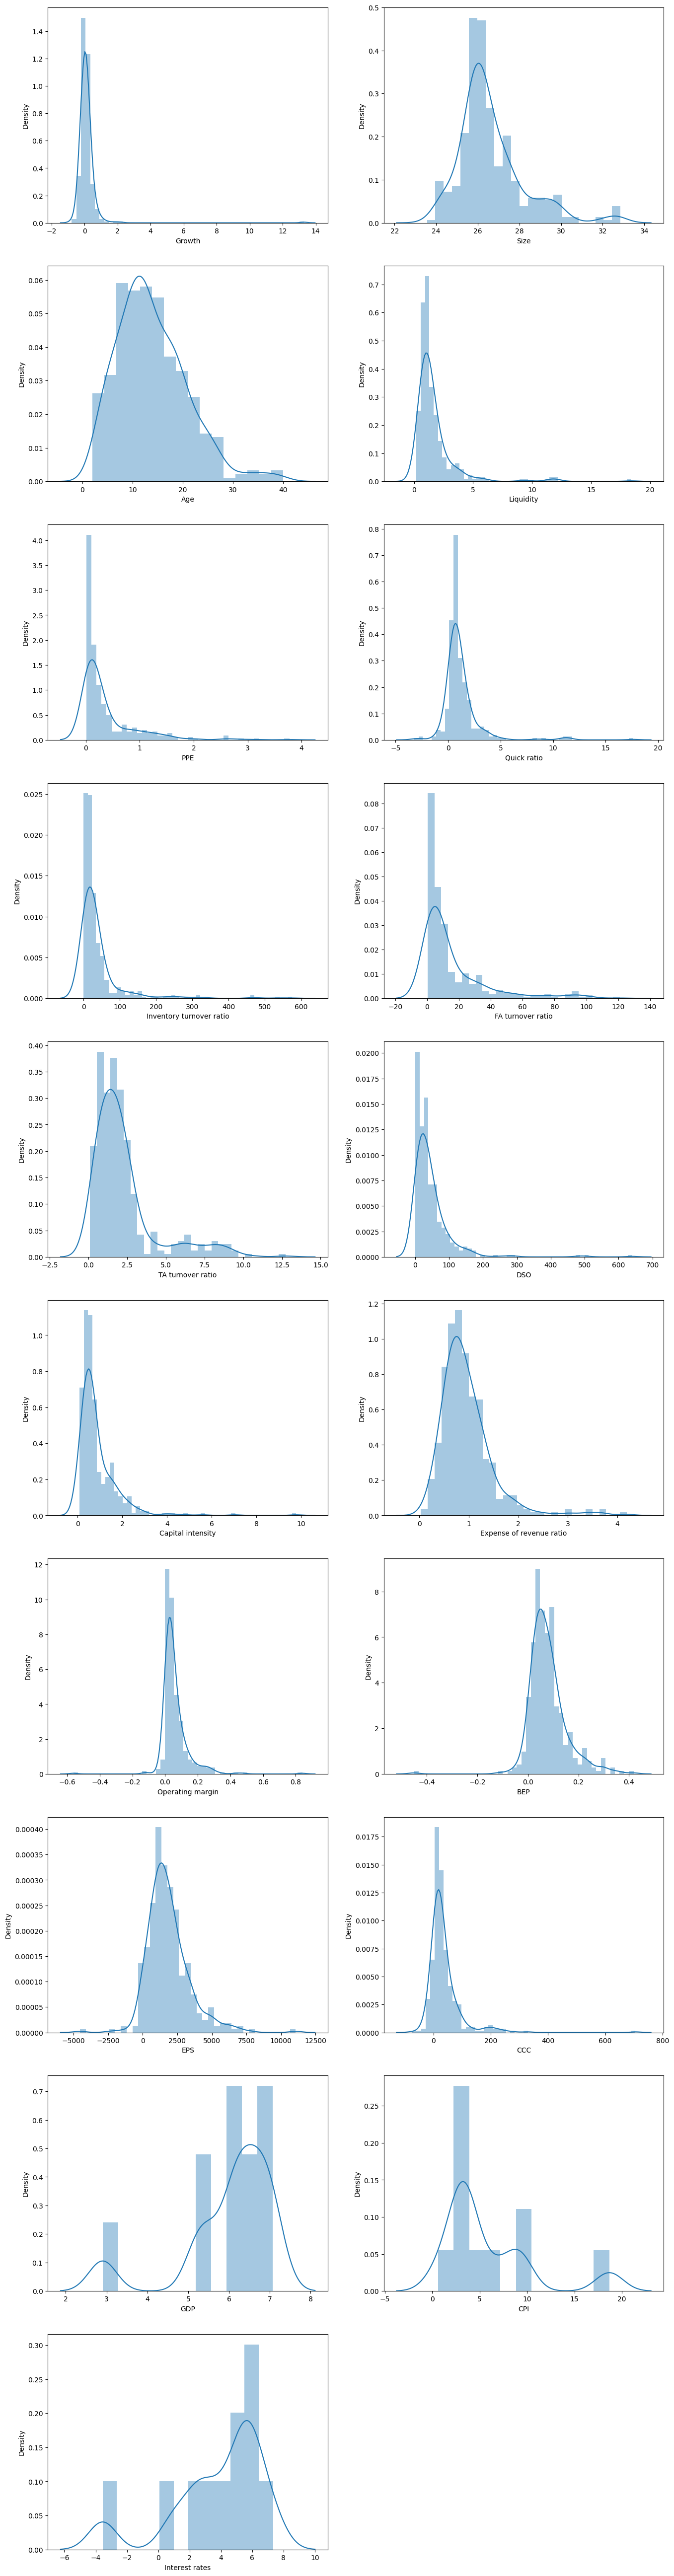

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(12,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity',  'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'BEP', 'EPS', 'CCC', 'GDP', 'CPI', 'Interest rates'])
#'ROE', 'Net profit margin','Leverage',

In [ ]:
# import seaborn as sns

# plt.figure(figsize=(16,80))
# def density(list_variables):
#   x=1
#   for i in list_variables:
#     plt.subplot(12,2,x)
#     sns.distplot(data[i])
#     x+=1
#   plt.show()

# density(['Growth', 'Size', 'Age', 'Liquidity', 'Leverage', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'Net profit margin', 'BEP', 'ROA', 'ROE', 'EPS', 'CCC', 'GDP', 'CPI', 'Interest rates'])

In [ ]:
name = ['Growth', 'PPE', 'Liquidity', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'CCC']
def capping(df):
  upper_limit = df[name].mean() + 3*df[name].std()
  lower_limit = df[name].mean() - 3*df[name].std()
  for i in name:
    df[name] = np.where(
      df[name]>upper_limit,
      upper_limit,
      np.where(
          df[name]<lower_limit,
          lower_limit,
          df[name]
      )
  )

capping(data)
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,EPS,BEP,CCC,GDP,CPI,Interest rates,Target
count,379.000000,384.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,382.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,26.634817,0.090767,0.346439,1.590032,13.885714,1.092061,36.742816,15.014987,2.265194,43.626999,0.842516,0.933745,0.057062,1849.070311,0.078919,34.636045,6.001623,5.821202,3.797918,0.423377
std,1.597797,0.322710,0.449357,1.310293,6.965124,1.306236,50.710628,19.381180,2.094988,43.560227,0.716562,0.464055,0.067338,1529.357764,0.075233,46.932761,1.132431,4.815109,2.947763,0.494737
min,23.556989,-0.777782,0.007582,0.207290,2.000000,-3.238448,0.094600,0.288325,0.102263,0.737147,0.078533,0.027471,-0.198122,-4538.435630,-0.450474,-74.160874,2.905836,0.631201,-3.551709,0.000000
25%,25.748456,-0.082687,0.061164,0.827333,9.000000,0.452243,10.579047,2.600104,0.918628,13.232312,0.396649,0.631770,0.017232,945.019155,0.035701,9.198185,5.421883,2.795824,2.294892,0.000000
50%,26.245426,0.060522,0.155337,1.171570,13.000000,0.797865,18.680795,7.140810,1.682887,32.302638,0.594217,0.840279,0.035600,1576.580040,0.065161,21.556420,6.240303,3.539628,4.825874,0.000000
75%,27.243430,0.199858,0.403902,1.812716,18.000000,1.426087,39.369052,18.301627,2.521120,58.259573,1.088580,1.138393,0.072740,2475.086390,0.103256,43.702709,6.812246,9.094703,5.814896,1.000000
max,32.858702,2.334154,1.926881,7.255935,40.000000,6.705759,248.403222,79.566327,12.733542,229.512507,3.652727,2.562741,0.314667,11061.460390,0.418193,215.983904,7.075789,18.677732,7.322258,1.000000


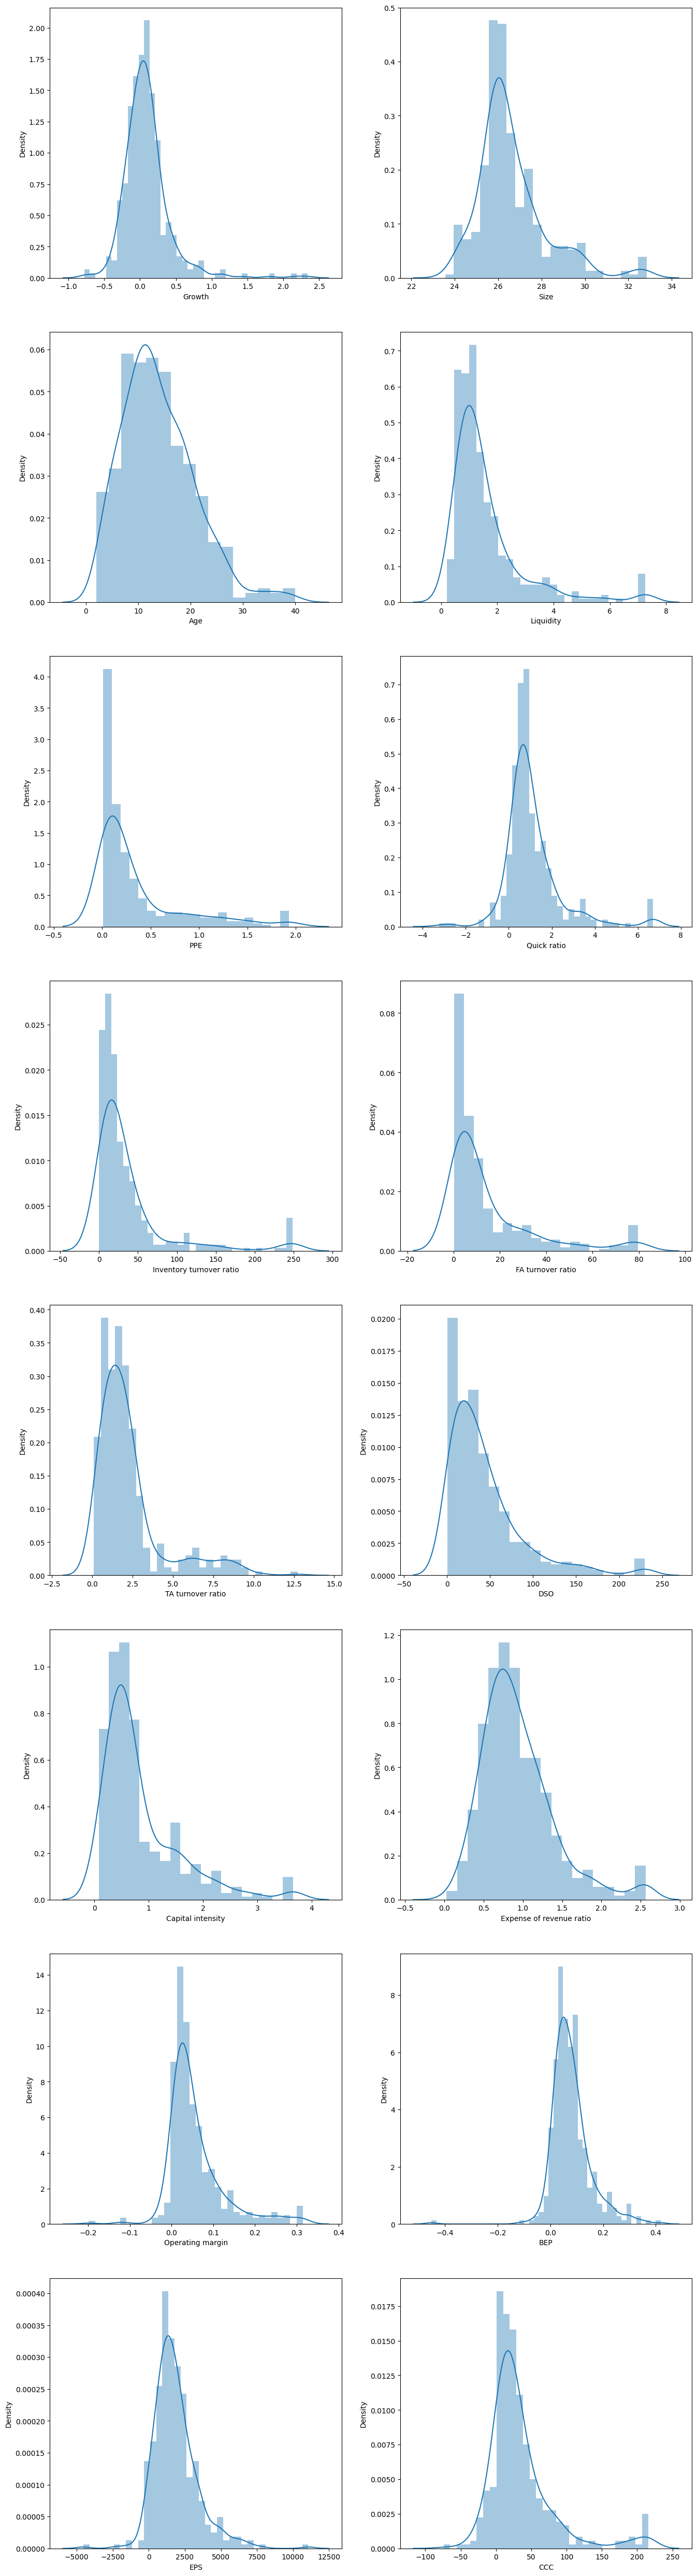

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(10,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()
#  'Leverage',
density(['Growth', 'Size', 'Age', 'Liquidity', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'BEP', 'EPS', 'CCC'])

In [ ]:
(data.isnull().sum()/385*100).sort_values(axis=0, ascending=False)

Size                        1.558442
EPS                         0.779221
Growth                      0.259740
Interest rates              0.000000
CPI                         0.000000
GDP                         0.000000
CCC                         0.000000
BEP                         0.000000
Operating margin            0.000000
Expense of revenue ratio    0.000000
Capital intensity           0.000000
DSO                         0.000000
TA turnover ratio           0.000000
FA turnover ratio           0.000000
Inventory turnover ratio    0.000000
Quick ratio                 0.000000
Age                         0.000000
Liquidity                   0.000000
PPE                         0.000000
Target                      0.000000
dtype: float64

<Axes: >

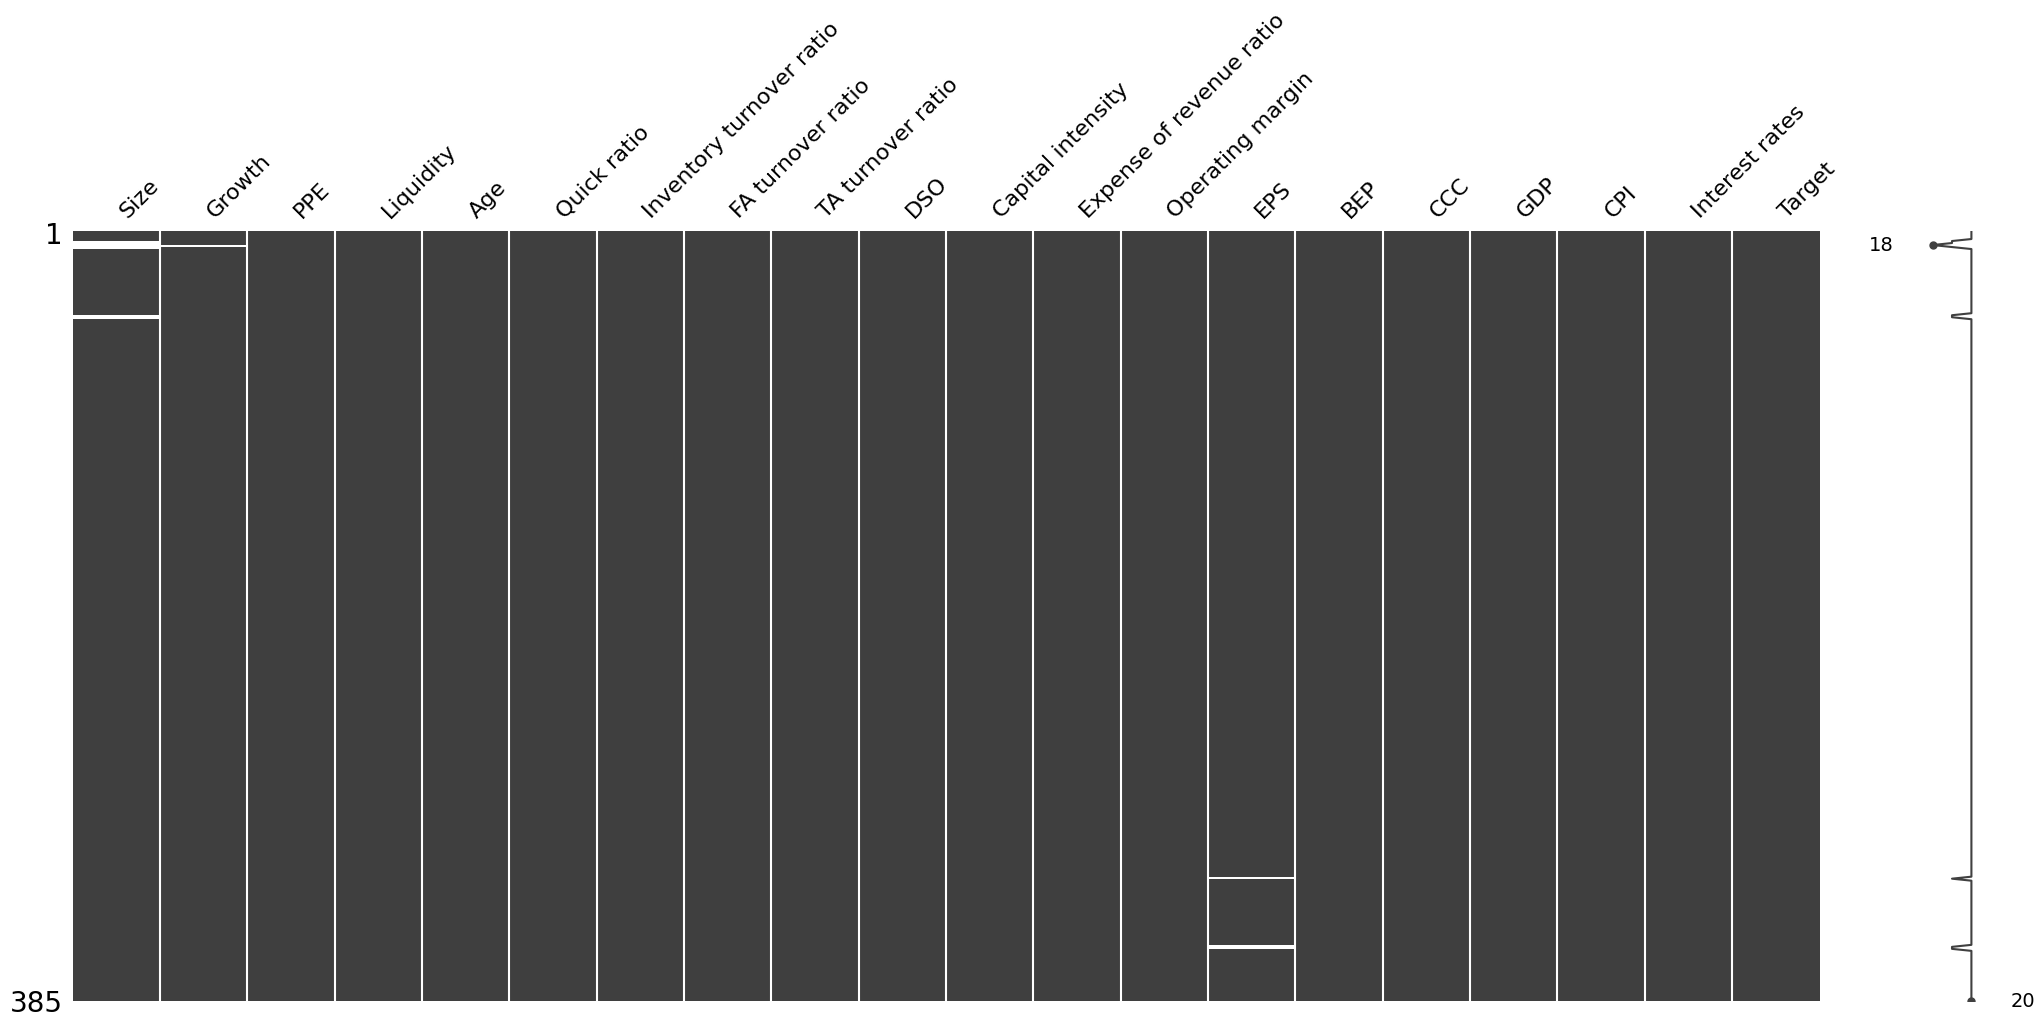

In [ ]:
import missingno

missingno.matrix(data)

In [ ]:
# Drop all columns that have at least 1 NaN
new_data = data.dropna(axis=0)
new_data = new_data.astype({'Age': int})
print(new_data.shape)

print(new_data.isnull().sum().sum())

(376, 20)
0


<Axes: >

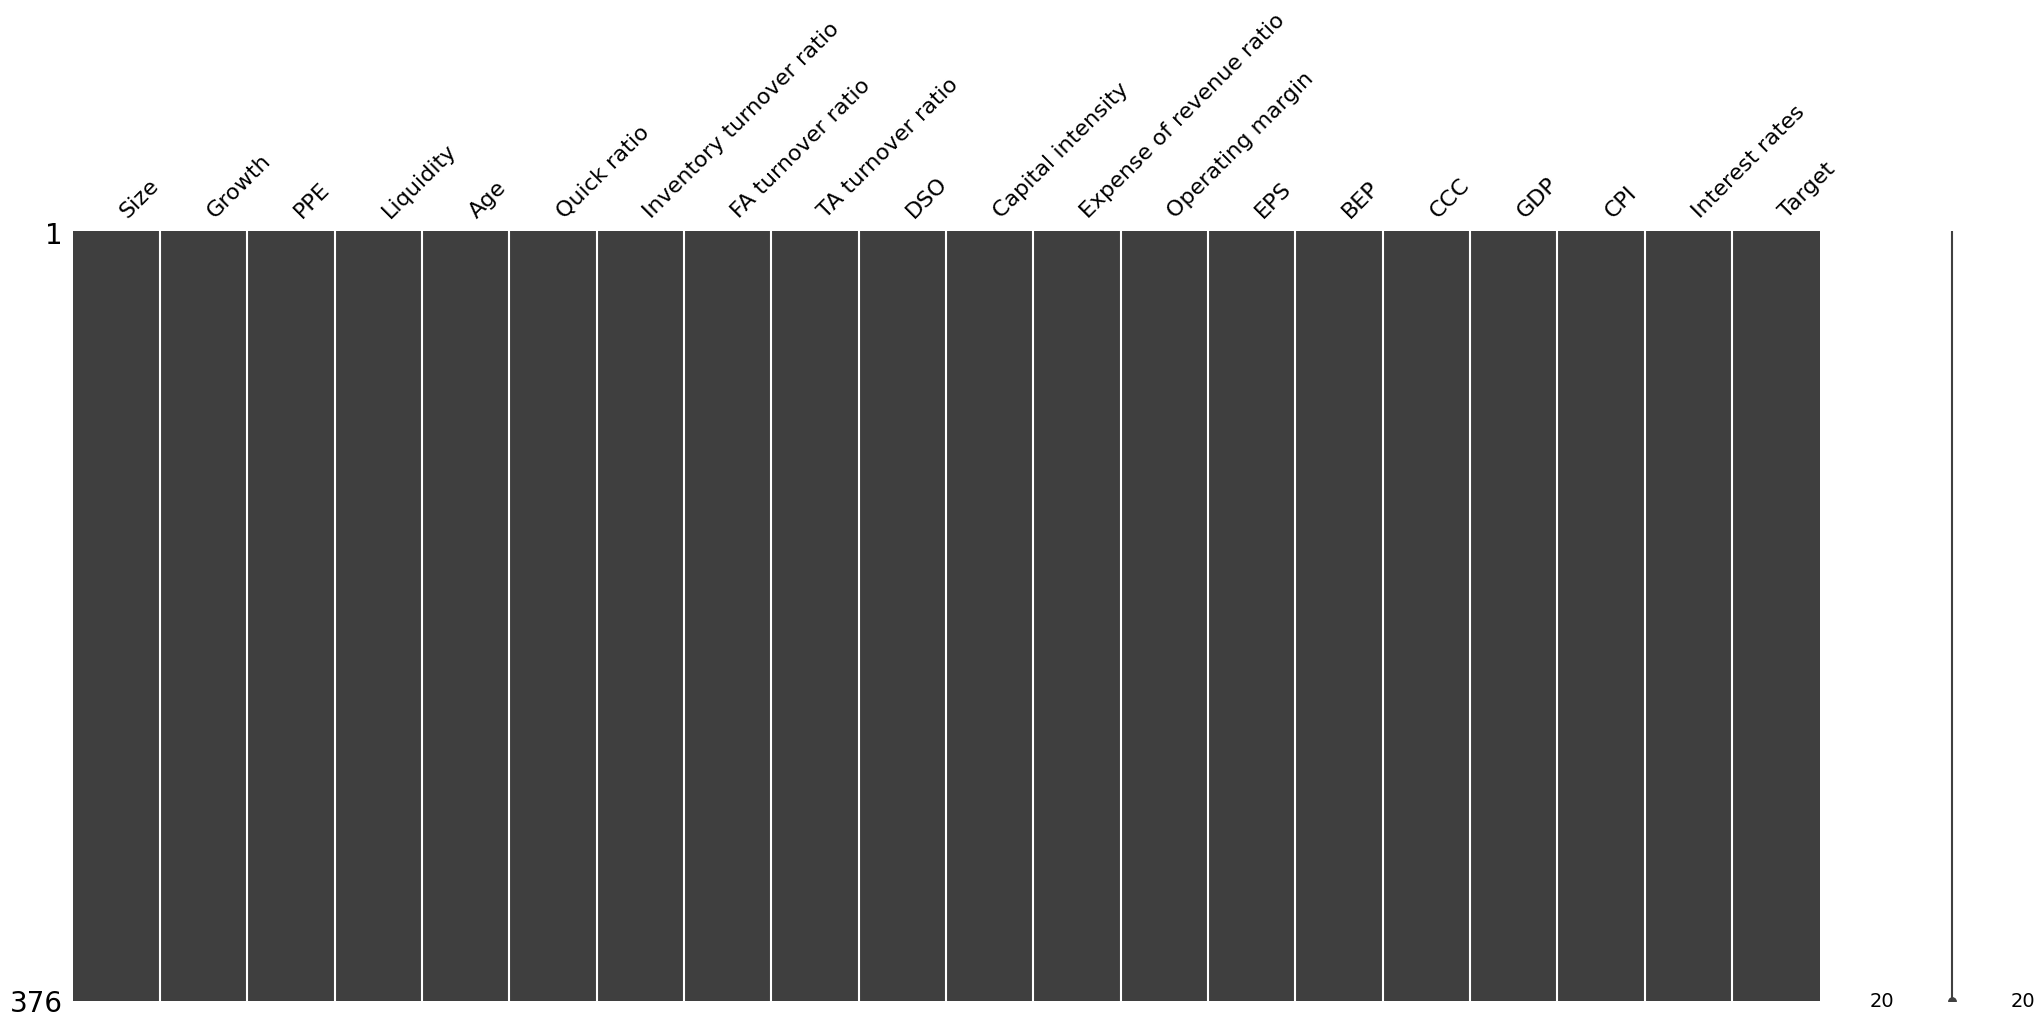

In [ ]:
import missingno

missingno.matrix(new_data)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from sklearn import preprocessing

X = new_data.drop('Target', axis=1)
y = new_data.Target


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Neural Network': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.


In [ ]:
for name, model in models.items():
  result = model.score(X_test, y_test)
  print(name + ': {:.2f}%'.format(result * 100))

Logistic Regression: 85.53%
K-Nearest Neighbors: 85.53%
Decision Tree: 78.95%
Support Vector Machine (Linear Kernel): 85.53%
Support Vector Machine (RBF Kernel): 82.89%
Neural Network: 84.21%
Random Forest: 84.21%


In [ ]:
y_test.value_counts() / len(y_test)

0.0    0.565789
1.0    0.434211
Name: Target, dtype: float64

In [ ]:
y.value_counts() / len(y)

0.0    0.582447
1.0    0.417553
Name: Target, dtype: float64


Logistic regression:
[[37  6]
 [ 5 28]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        43
         1.0       0.82      0.85      0.84        33

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



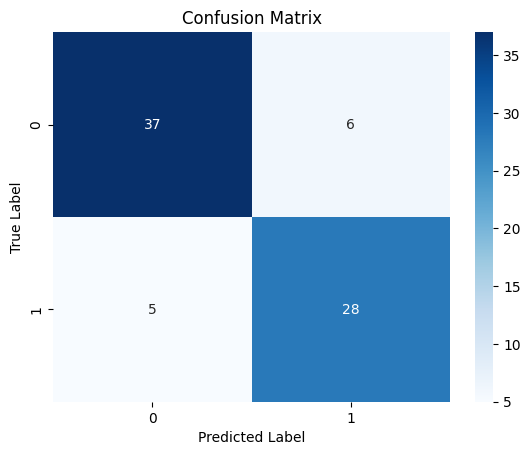

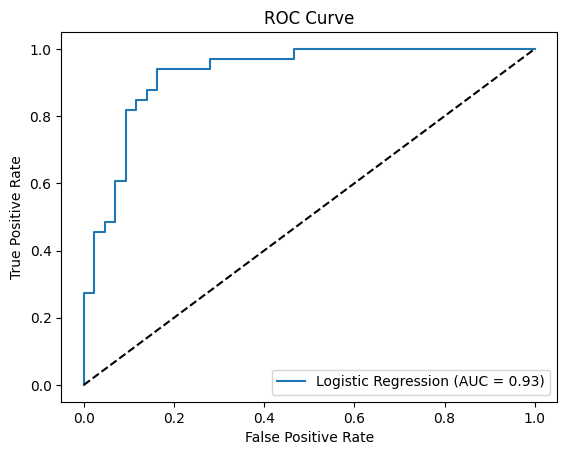

LogisticRegression(random_state=38)

In [ ]:
#baseline
def baseline_model(X_train, y_train, X_test, y_test):
    baseline = LogisticRegression(random_state=38)
    baseline.fit(X_train, y_train)

    # predict on test set
    y_pred_baseline = baseline.predict(X_test)

    # print evaluation metrics
    print("\nLogistic regression:")
    print(confusion_matrix(y_test, y_pred_baseline))
    print(classification_report(y_test, y_pred_baseline))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, cmap="Blues", fmt="d",
                    xticklabels=["0", "1"],
                    yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # predict probabilities for test set
    y_pred_prob_baseline = baseline.predict_proba(X_test)[:, 1]

    # calculate ROC-AUC score
    roc_auc_baseline = roc_auc_score(y_test, y_pred_prob_baseline)

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_baseline)
    plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_baseline))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    return baseline
#baseline report
baseline_model(X_train, y_train, X_test, y_test)

In [ ]:
def random_forest_tuning(X_train, y_train, X_test, y_test):
# define parameter grid
    param_grid = {'n_estimators': [10],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)}
    # create grid search object
    grid = GridSearchCV(RandomForestClassifier(random_state=38), param_grid, cv=5, scoring='accuracy')

    # fit grid search object to data
    grid.fit(X_train, y_train)

    # print results
    print("Best parameters: ", grid.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))

    # use best parameters to fit model to data
    rf = grid.best_estimator_
    rf.fit(X_train, y_train)

    # predict on test set
    y_pred_rf = rf.predict(X_test)

    # print evaluation metrics
    print("\nRandom Forest:")
    print(confusion_matrix(y_test, y_pred_rf))
    print(classification_report(y_test, y_pred_rf))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
                xticklabels=["0", "1"],
                yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return rf

Best parameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 10}
Best cross-validation score: 0.81

Random Forest:
[[36  7]
 [ 7 26]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        43
         1.0       0.79      0.79      0.79        33

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



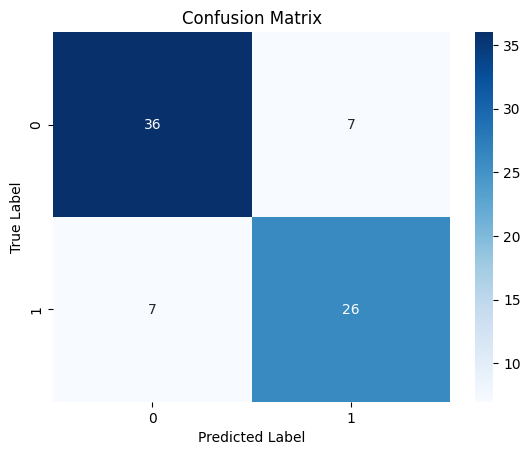

RandomForestClassifier(max_depth=7, min_samples_split=7, n_estimators=10,
                       random_state=38)

In [ ]:
import numpy as np
random_forest_tuning(X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

optimal n_estimators value is 25 that accuracy is 0.6944912280701755


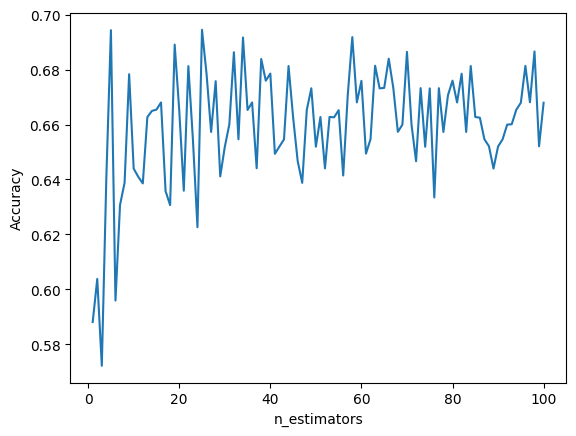

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1, 101))   # 100 trường hợp từ 1 đến 100 Decision Trees để tạo 100 Random Forest Metrics.
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+1

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

optimal n_estimators value is 25 that accuracy is 0.6944912280701755


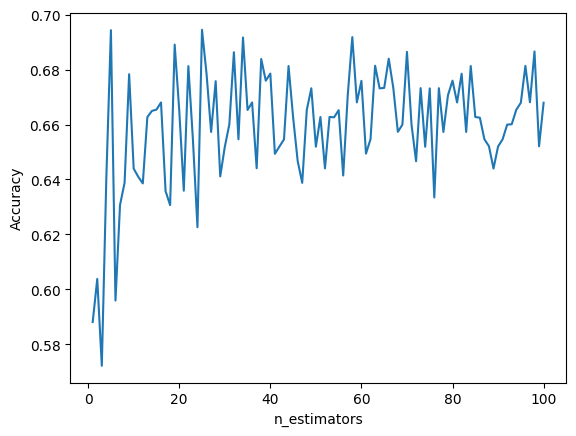

In [ ]:
print(f'optimal n_estimators value is {ind} that accuracy is {max(scores)}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

rf = RandomForestClassifier(n_estimators=ind, random_state=0)

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

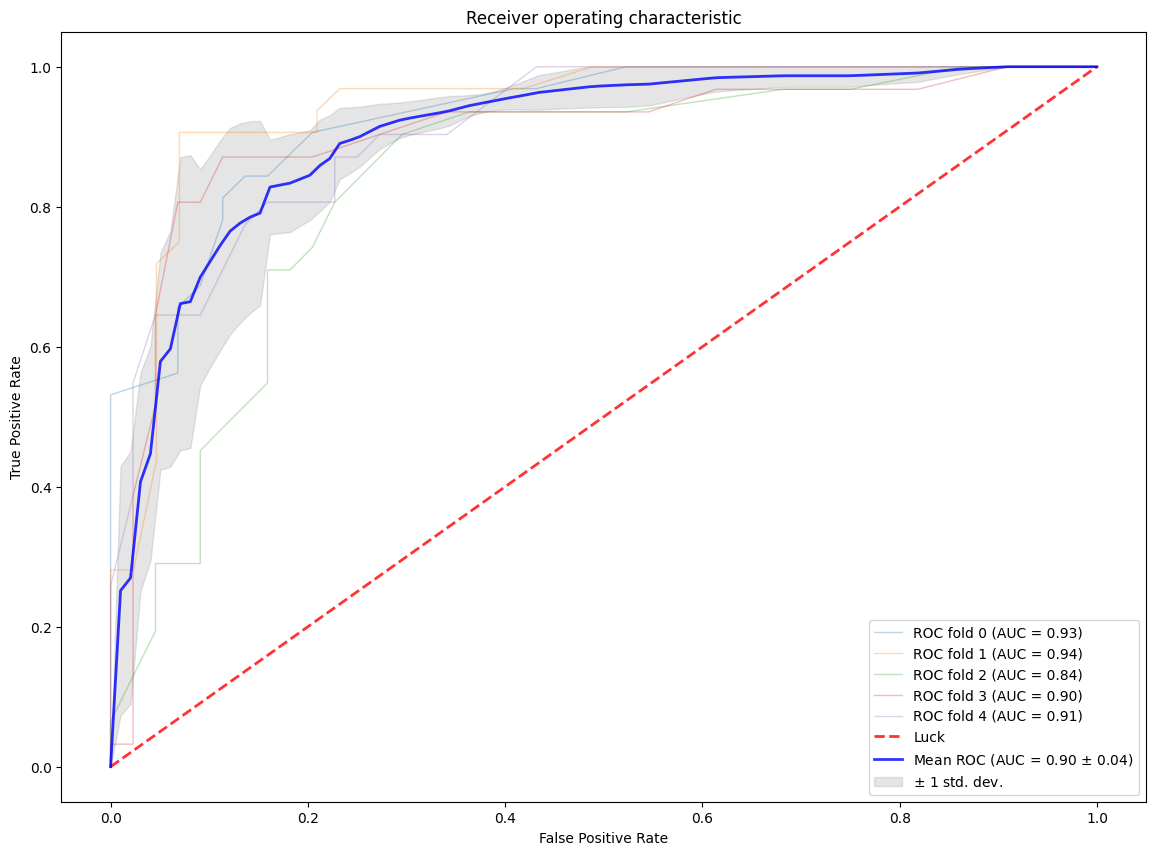

,AUC Train,AUC Test
0,1.000000,0.927557
1,0.999977,0.941134
2,1.000000,0.838710
3,1.000000,0.901760
4,1.000000,0.911657


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [ ]:
ft_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ft_imp)

Capital intensity           0.103701
Liquidity                   0.081758
Inventory turnover ratio    0.081500
Quick ratio                 0.072150
Operating margin            0.064594
Size                        0.061840
TA turnover ratio           0.057132
EPS                         0.056623
BEP                         0.055162
Growth                      0.051461
PPE                         0.051364
CCC                         0.046942
Expense of revenue ratio    0.041541
DSO                         0.041263
FA turnover ratio           0.041142
Age                         0.026141
GDP                         0.025093
CPI                         0.023497
Interest rates              0.017097
dtype: float64


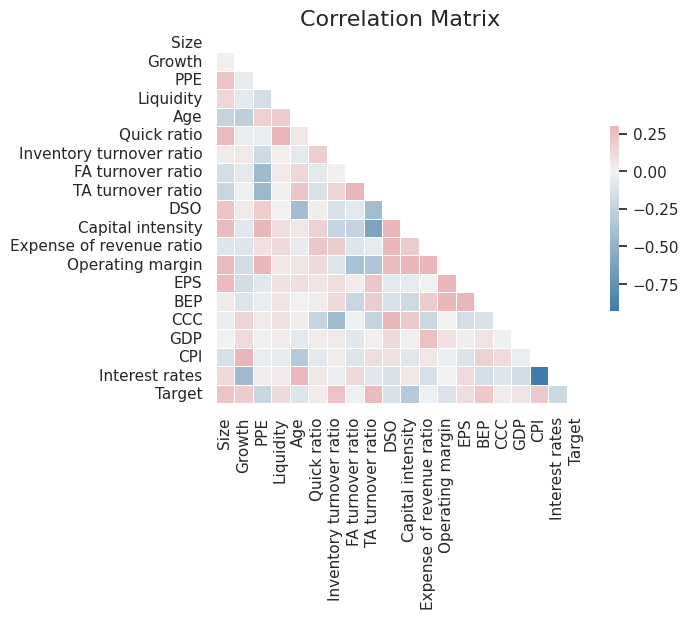

In [ ]:
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")
corr_mat = data.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)

y_pred = rf.predict(X_test)

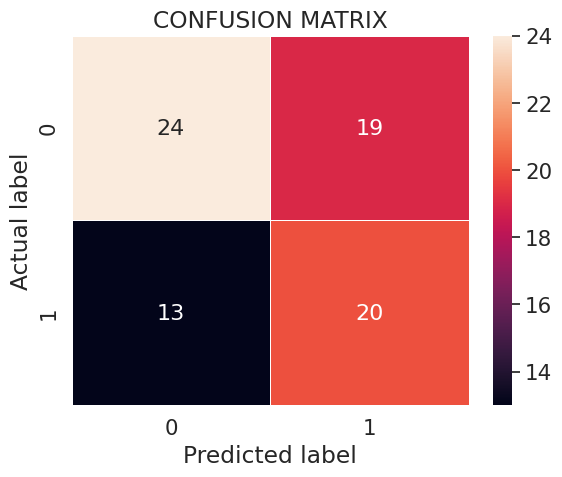

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

LABELS = [0, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, linewidths=.5, xticklabels=LABELS, yticklabels=LABELS) # font size
plt.title('CONFUSION MATRIX')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.65      0.56      0.60        43
         1.0       0.51      0.61      0.56        33

    accuracy                           0.58        76
   macro avg       0.58      0.58      0.58        76
weighted avg       0.59      0.58      0.58        76



In [ ]:
y_pred

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0.])